In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_excel('Data_Train.xlsx')
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_df = pd.read_excel('Test_set.xlsx')
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
final_df = train_df.append(test_df)
final_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [6]:
final_df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

## Feature Engineering Process :


In [7]:
# Extracting the date from the Date_of_Journey column
final_df['Date_of_Journey'].str.split('/').str[0]

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [8]:
final_df['Date'] = final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']= final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year'] = final_df['Date_of_Journey'].str.split('/').str[2]

#or you can use lambda function :
#final_df['Date'] = final_df['Date_of_Journey'].apply(lambda x : x.split("/")[0])
#final_df['Month'] =  final_df['Date_of_Journey'].apply(lambda x : x.split("/")[1])
#final_df['Year'] =  final_df['Date_of_Journey'].apply(lambda x : x.split("/")[2])

In [9]:
#converting the date , month and year to integer :
final_df['Date'] = final_df['Date'].astype(int)
final_df['Month'] = final_df['Month'].astype(int)
final_df['Year'] = final_df['Year'].astype(int)

In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [11]:
#Drop the date_of_Journey column :
final_df.drop('Date_of_Journey' , axis = 1 ,inplace=True)
final_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,6,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,3,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019


In [12]:
 #extracting the arrival time from arrival_Time
final_df['Arrival_Time'].str.split(' ').str[0]
#or
#df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [13]:
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [14]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [15]:
final_df['Arrival_hour'] = final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min'] = final_df['Arrival_Time'].str.split(':').str[1]

In [16]:
final_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15


In [17]:
final_df['Arrival_hour'] = final_df['Arrival_hour'].astype(int)
final_df['Arrival_min'] = final_df['Arrival_min'].astype(int)

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_hour     13354 non-null  int32  
 14  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


In [19]:
final_df.drop('Arrival_Time' , axis=1, inplace=True)

In [20]:
final_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15


In [21]:
final_df['Dep_hour'] = final_df['Dep_Time'].str.split(':').str[0]
final_df['Dep_min'] = final_df['Dep_Time'].str.split(':').str[1]

In [22]:
final_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50


In [23]:
final_df.drop('Dep_Time' , axis = 1, inplace=True)

In [24]:
final_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50


In [25]:
final_df['Dep_hour'] = final_df['Dep_hour'].astype(int)
final_df['Dep_min'] = final_df['Dep_min'].astype(int)

In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dep_hour         13354 non-null  int32  
 14  Dep_min          13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [27]:
final_df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [28]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [29]:
final_df['Total_Stops'] = final_df['Total_Stops'].map({'non-stop' : 0, '1 stop' : 1 , '2 stops' :2, '3 stops' : 3, '4 stops' : 4 , 'NaN' : 5})

In [30]:
final_df['Total_Stops'].unique()

array([ 0.,  2.,  1.,  3., nan,  4.])

In [31]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [32]:
final_df.drop(9039 , inplace = True)

In [33]:
#dropping the route column :
final_df.drop('Route' , axis=1, inplace=True)

In [34]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [35]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [36]:
final_df['Duration_Hour'] = final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [37]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [38]:
final_df[final_df['Duration']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [39]:
#droppin the duration with 5m
final_df.drop(6474, axis =0 , inplace = True)
final_df.drop(2660, axis =0 , inplace = True)

In [40]:
final_df[final_df['Duration']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Hour


In [41]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  object 
 1   Source           13350 non-null  object 
 2   Destination      13350 non-null  object 
 3   Duration         13350 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13350 non-null  object 
 6   Price            10680 non-null  float64
 7   Date             13350 non-null  int32  
 8   Month            13350 non-null  int32  
 9   Year             13350 non-null  int32  
 10  Arrival_hour     13350 non-null  int32  
 11  Arrival_min      13350 non-null  int32  
 12  Dep_hour         13350 non-null  int32  
 13  Dep_min          13350 non-null  int32  
 14  Duration_Hour    13350 non-null  object 
dtypes: float64(2), int32(7), object(6)
memory usage: 1.3+ MB


In [42]:
#convertin the data type from object to int
final_df['Duration_Hour'] = final_df['Duration_Hour'].astype(int)

In [43]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  object 
 1   Source           13350 non-null  object 
 2   Destination      13350 non-null  object 
 3   Duration         13350 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13350 non-null  object 
 6   Price            10680 non-null  float64
 7   Date             13350 non-null  int32  
 8   Month            13350 non-null  int32  
 9   Year             13350 non-null  int32  
 10  Arrival_hour     13350 non-null  int32  
 11  Arrival_min      13350 non-null  int32  
 12  Dep_hour         13350 non-null  int32  
 13  Dep_min          13350 non-null  int32  
 14  Duration_Hour    13350 non-null  int32  
dtypes: float64(2), int32(8), object(5)
memory usage: 1.2+ MB


In [44]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [45]:
final_df[final_df['Year'] == 2019].groupby(['Airline' ]).size().reset_index().rename(columns={0:'No. of Flights '})

,Airline,No. of Flights
0,Air Asia,405
1,Air India,2189
2,GoAir,240
3,IndiGo,2564
4,Jet Airways,4745
5,Jet Airways Business,8
6,Multiple carriers,1543
7,Multiple carriers Premium economy,16
8,SpiceJet,1026
9,Trujet,1


In [46]:
final_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [47]:
final_df[final_df['Source'] == 'Mumbai'].groupby(['Airline']).size().reset_index().rename

<bound method DataFrame.rename of        Airline    0
0    Air India  174
1       IndiGo  245
2  Jet Airways  269
3     SpiceJet  163
4       Trujet    1
5      Vistara   29>

In [48]:
final_df['Airline'].value_counts()

Jet Airways                          4745
IndiGo                               2564
Air India                            2189
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


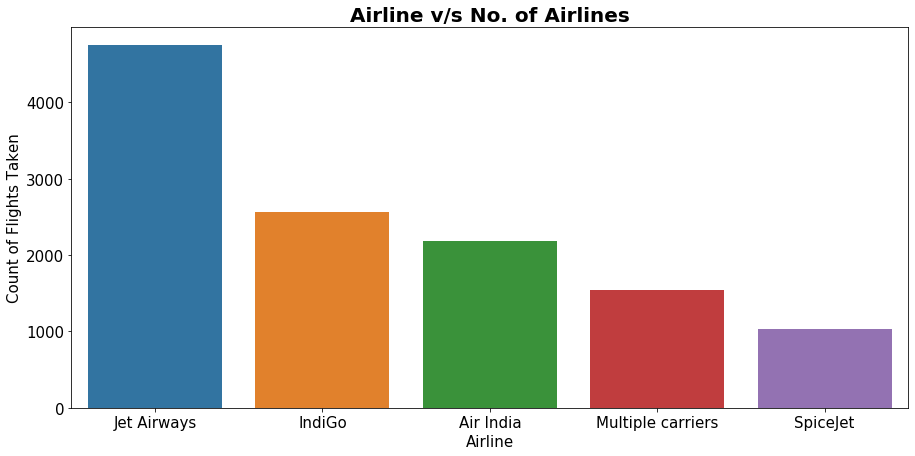

In [49]:
plt.figure(figsize=(15,7))
sns.barplot(list(final_df['Airline'].value_counts()[0:5].keys()), list(final_df['Airline'].value_counts()[0:5]))
plt.title('Airline v/s No. of Airlines', fontweight = 'bold', size = 20)
plt.xticks(size= 15)
plt.yticks(size= 15)
plt.xlabel('Airline' , size = 15)
plt.ylabel('Count of Flights Taken', size = 15)
plt.show()

## Observations :
The majority of people's flights were with Jet Airways.

### Filling in the missing price values :

In [50]:
final_df['Price'].isna().sum()

2670

In [51]:
final_df['Price'].median()

8372.0

### Filling in the missing price values with median :

In [52]:
final_df['Price'] = final_df['Price'].fillna(final_df['Price'].median())

In [53]:
final_df['Price'].isna().sum()

0

C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


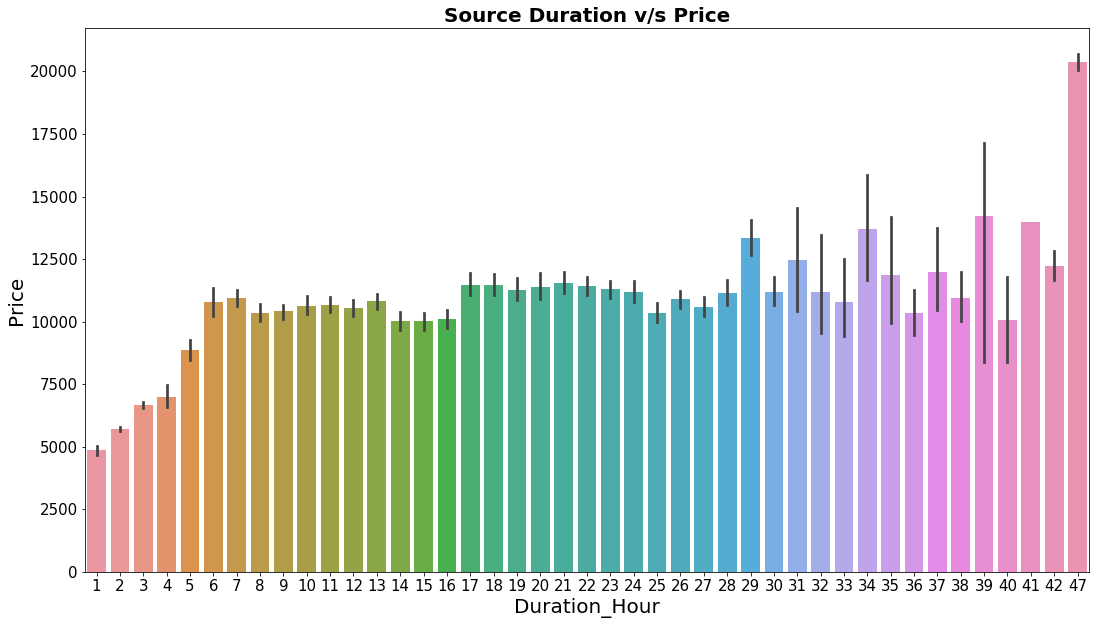

In [54]:
plt.figure(figsize=(18,10))
sns.barplot('Duration_Hour' , 'Price' , data=final_df)
plt.title('Source Duration v/s Price', size = 20, fontweight = 'bold')
plt.xticks(size= 15)
plt.yticks(size= 15)
plt.xlabel('Duration_Hour' , size = 20 )
plt.ylabel('Price', size = 20)
plt.show()

## Observations :
The length of the flight closely relates to the cost.

C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

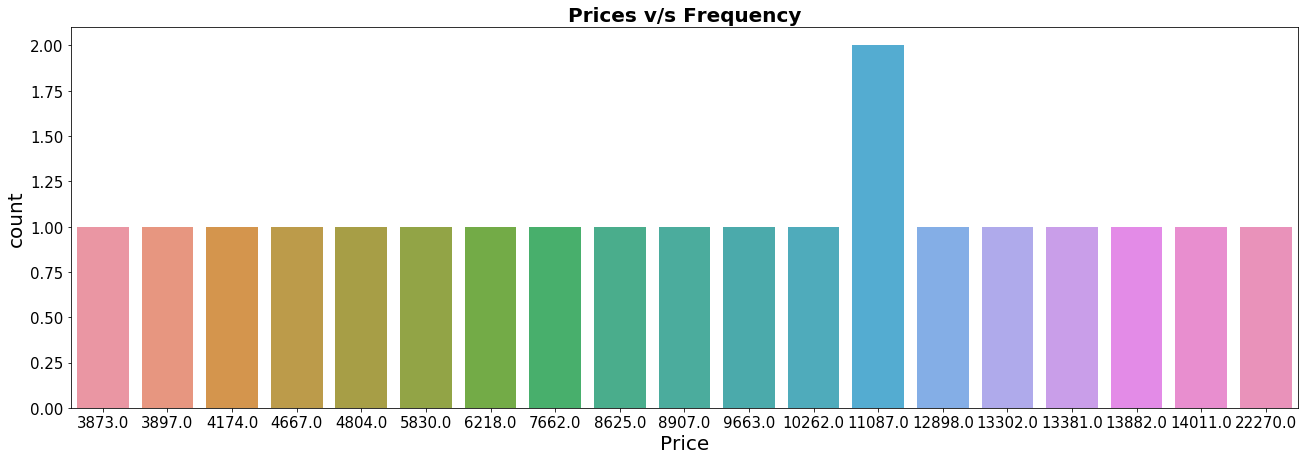

In [55]:
plt.figure(figsize=(22,7))
sns.countplot(final_df['Price'][:20])
plt.title("Prices v/s Frequency", size = 20, fontweight = 'bold')
plt.xticks(size= 15)
plt.yticks(size= 15)
plt.xlabel('Price',size = 20 )
plt.ylabel('count', size = 20)

## Observations :
The most items fall under the price range 11087.

C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

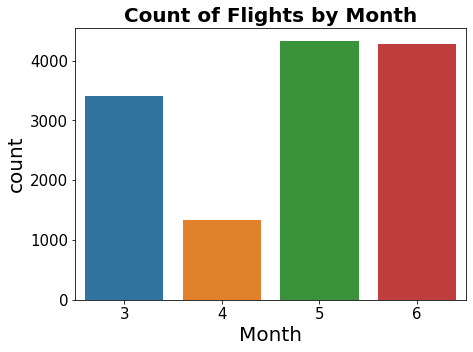

In [56]:
plt.figure(figsize=(7,5))
sns.countplot(final_df['Month'] )
plt.title("Count of Flights by Month", size = 20, fontweight = 'bold')
plt.xticks(size= 15)
plt.yticks(size= 15)
plt.xlabel('Month',size = 20 )
plt.ylabel('count', size = 20)

# Observations :
Maximum flights were taken in the 5th and 6th month (May , June)

In [57]:
final_df.groupby('Month').size().reset_index().rename(columns={0:'Total number of flights booked'})

,Month,Total number of flights booked
0,3,3410
1,4,1327
2,5,4328
3,6,4285


In [58]:
may_airlines= final_df[final_df['Month']==5]

In [59]:
may_airlines

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Hour
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
9,Multiple carriers,Delhi,Cochin,7h 50m,1.0,No info,8625.0,27,5,2019,19,15,11,25,7
13,Jet Airways,Kolkata,Banglore,12h 10m,1.0,In-flight meal not included,9663.0,9,5,2019,9,20,21,10,12
19,Jet Airways,Delhi,Cochin,20h 35m,1.0,In-flight meal not included,12898.0,27,5,2019,12,35,16,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,Air India,Kolkata,Banglore,27h 5m,2.0,No info,8372.0,9,5,2019,8,55,5,50,27
2653,Jet Airways,Kolkata,Banglore,6h 5m,1.0,In-flight meal not included,8372.0,18,5,2019,22,35,16,30,6
2656,Jet Airways,Kolkata,Banglore,12h 10m,1.0,In-flight meal not included,8372.0,12,5,2019,9,20,21,10,12
2662,Air India,Mumbai,Hyderabad,1h 30m,0.0,No info,8372.0,21,5,2019,15,25,13,55,1


In [60]:
june_airlines=final_df[final_df['Month']==6]
june_airlines

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Hour
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
5,SpiceJet,Kolkata,Banglore,2h 25m,0.0,No info,3873.0,24,6,2019,11,25,9,0,2
10,Air India,Delhi,Cochin,13h 15m,1.0,No info,8907.0,1,6,2019,23,0,9,45,13
12,Air India,Chennai,Kolkata,2h 15m,0.0,No info,4667.0,24,6,2019,13,55,11,40,2
17,Jet Airways,Delhi,Cochin,22h 35m,1.0,In-flight meal not included,10262.0,12,6,2019,12,35,14,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,Jet Airways,Delhi,Cochin,7h 5m,2.0,In-flight meal not included,8372.0,15,6,2019,12,35,5,30,7
2664,Multiple carriers,Delhi,Cochin,10h 15m,1.0,No info,8372.0,15,6,2019,1,30,15,15,10
2665,SpiceJet,Mumbai,Hyderabad,1h 30m,0.0,No check-in baggage included,8372.0,21,6,2019,0,15,22,45,1
2666,Air India,Kolkata,Banglore,23h 55m,1.0,No info,8372.0,6,6,2019,20,25,20,30,23


C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


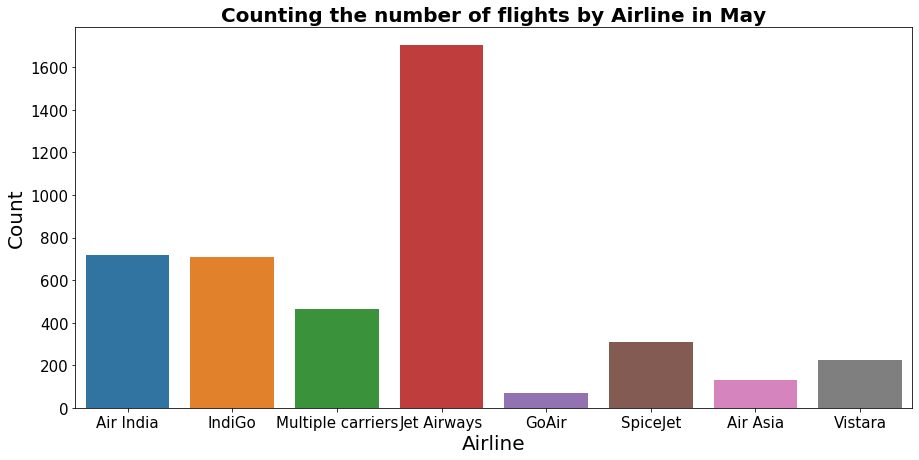

In [65]:
#Majority airlines booked in the month of May :
plt.figure(figsize=(15, 7))
sns.countplot(may_airlines['Airline'])
plt.title("Counting the number of flights by Airline in May", size = 20, fontweight = 'bold')
plt.xticks(size= 15)
plt.yticks(size= 15)
plt.xlabel('Airline',size = 20 )
plt.ylabel('Count', size = 20)
plt.show()

# Observations :
Most people booked their flights on Jet Airways in May, and very few people travelled on GoAir.

C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


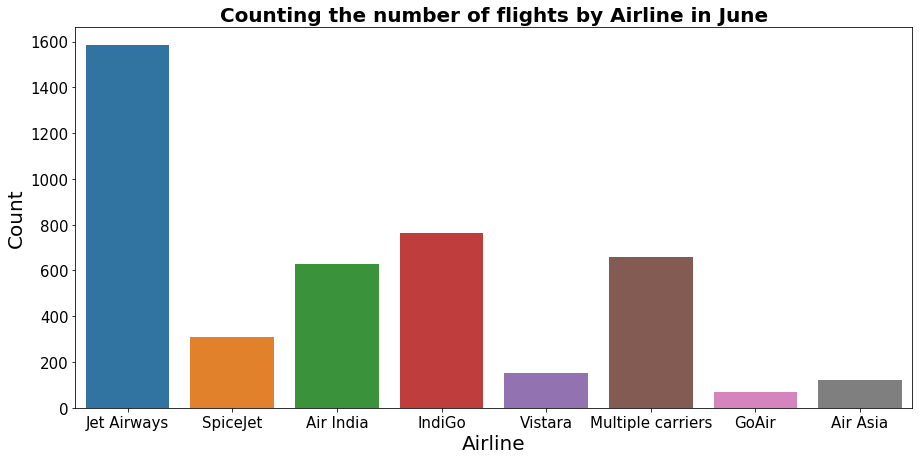

In [66]:
#Which airline was booked the most in the month of June 
plt.figure(figsize=(15, 7))
sns.countplot(june_airlines['Airline'])
plt.title("Counting the number of flights by Airline in June", size = 20, fontweight = 'bold')
plt.xticks(size= 15)
plt.yticks(size= 15)
plt.xlabel('Airline',size = 20 )
plt.ylabel('Count', size = 20)
plt.show()


# Observations :
The majority rebooked Jet Airways, and a small number of them chose GoAir for their June travel.

C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


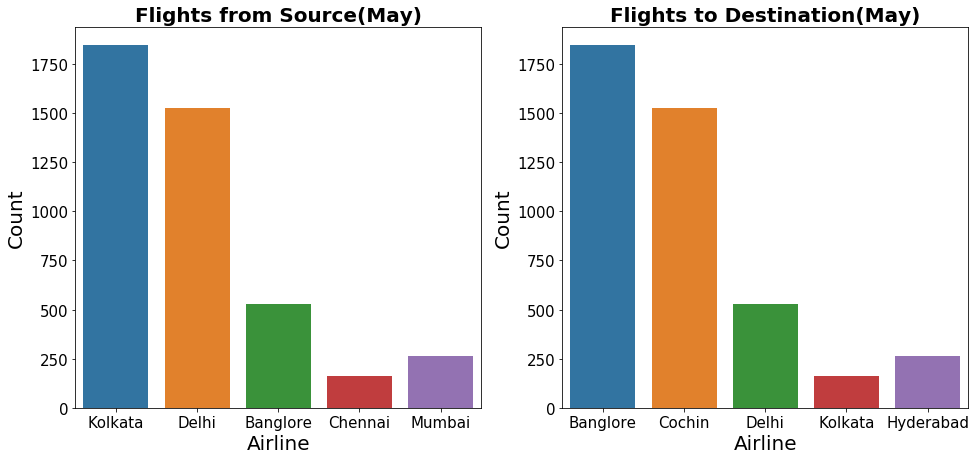

In [67]:
#Which was the most travelled sorce and  destination in may ?
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)

sns.countplot(may_airlines['Source'])
plt.title("Flights from Source(May)", fontweight= 'bold', size = 20)
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.xlabel('Airline',size = 20 )
plt.ylabel('Count', size = 20)

plt.subplot(1,2,2)
sns.countplot(may_airlines['Destination'])
plt.title("Flights to Destination(May)", fontweight= 'bold', size = 20)
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.xlabel('Airline',size = 20 )
plt.ylabel('Count', size = 20)
plt.show()

# Observations :
Most of the people travelled from Kolkata to Bangalore in May.

C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

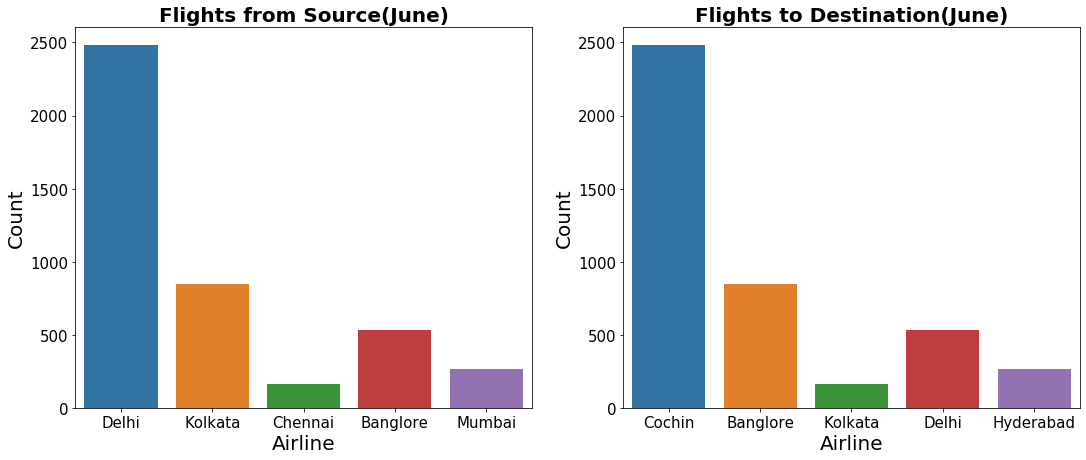

In [68]:
#which was the most travelled source and destination in june
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.countplot(june_airlines['Source'])
plt.title("Flights from Source(June)", fontweight= 'bold', size = 20)
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.xlabel('Airline',size = 20 )
plt.ylabel('Count', size = 20)

plt.subplot(1,2,2)
sns.countplot(june_airlines['Destination'])
plt.title("Flights to Destination(June)", fontweight= 'bold', size = 20)
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.xlabel('Airline',size = 20 )
plt.ylabel('Count', size = 20)

## Observations :
Most of the people travelled from Delhi to Cochin in June.

C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


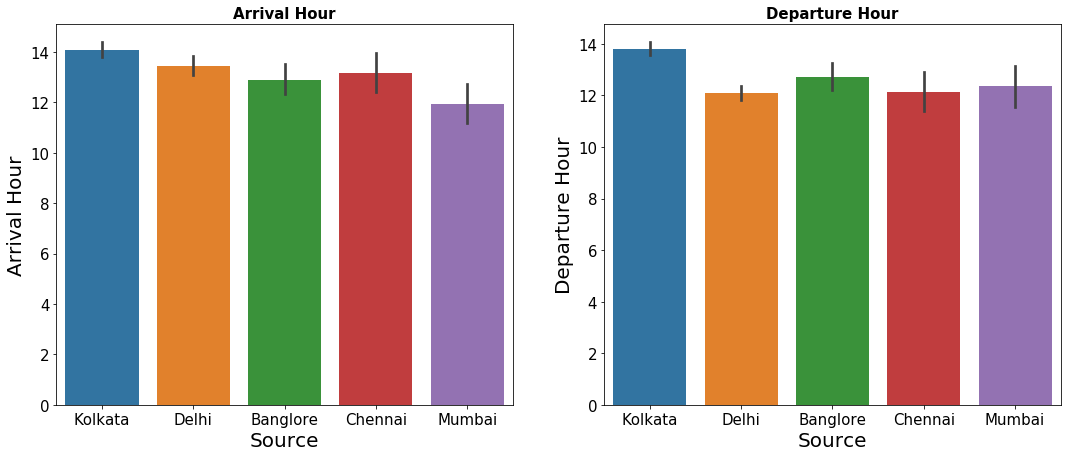

In [69]:
#at what time of the day the airlines had their arrival and departure
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.barplot(may_airlines['Source'] , may_airlines['Arrival_hour'])
plt.title('Arrival Hour', fontweight = 'bold', size=15)
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.xlabel('Source',size = 20 )
plt.ylabel('Arrival Hour', size = 20)

plt.subplot(1,2,2)
sns.barplot(may_airlines['Source'] , may_airlines['Dep_hour'])
plt.title('Departure Hour', fontweight = 'bold', size = 15)
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.xlabel('Source',size = 20 )
plt.ylabel('Departure Hour', size = 20)
plt.show()

## Observations :

The arrival hour and departure hour slightly differs for source destinations.

C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


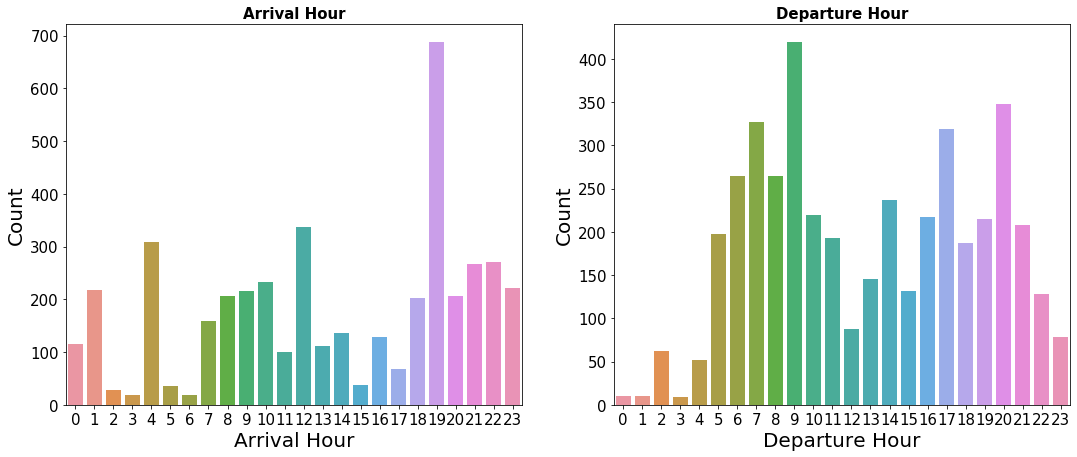

In [70]:
#at what time of the day the airlines had their arrival and departure
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.countplot(may_airlines['Arrival_hour'])
plt.title('Arrival Hour', fontweight = 'bold', size=15)
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.ylabel('Count',size = 20 )
plt.xlabel('Arrival Hour', size = 20)

plt.subplot(1,2,2)
sns.countplot(may_airlines['Dep_hour'])
plt.title('Departure Hour', fontweight = 'bold', size = 15)
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.ylabel('Count',size = 20 )
plt.xlabel('Departure Hour', size = 20)
plt.show()

## Observations :

Most of the planes arrived at the source on average at 7 p.m., and most of them left on average at 9 a.m.

C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


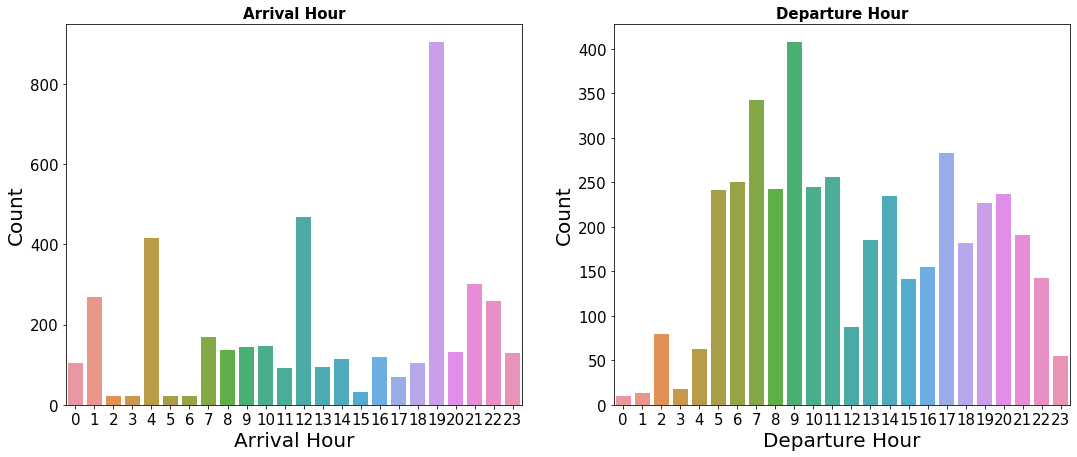

In [71]:
#at what time of the day the airlines had their arrival and departure
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.countplot(june_airlines['Arrival_hour'])
plt.title('Arrival Hour', fontweight = 'bold', size=15)
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.ylabel('Count',size = 20 )
plt.xlabel('Arrival Hour', size = 20)

plt.subplot(1,2,2)
sns.countplot(june_airlines['Dep_hour'])
plt.title('Departure Hour', fontweight = 'bold', size = 15)
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.ylabel('Count',size = 20 )
plt.xlabel('Departure Hour', size = 20)
plt.show()

C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Departure Hour')

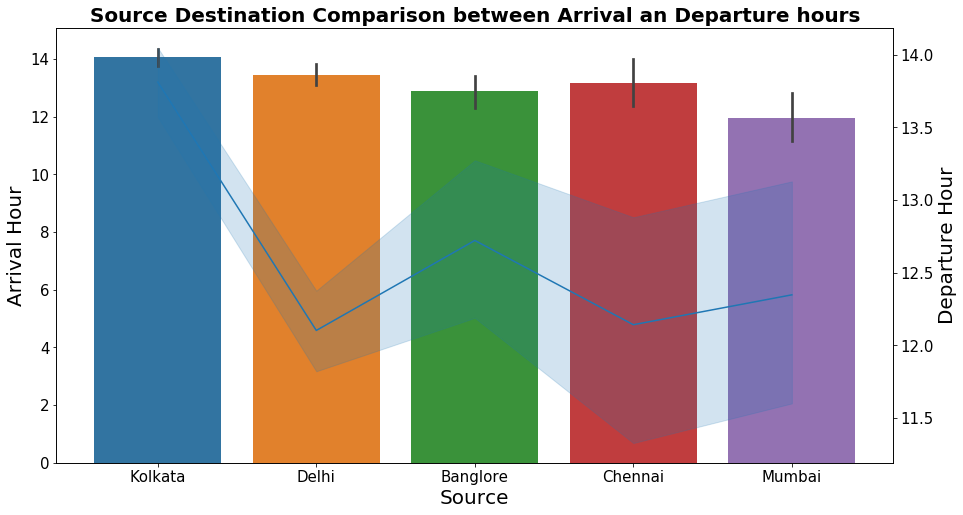

In [72]:
plt.figure(figsize=(15,8))
ax = sns.barplot(may_airlines['Source'] , may_airlines['Arrival_hour'])
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.xlabel('Source',size = 20 )
plt.ylabel('Arrival Hour', size = 20)

ax2 = ax.twinx()
sns.lineplot(may_airlines['Source'] , may_airlines['Dep_hour'])
plt.title("Source Destination Comparison between Arrival an Departure hours", fontweight= 'bold', size = 20)
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.xlabel('Source',size = 20 )
plt.ylabel('Departure Hour', size = 20)

## Observations :
The departure hour is generally between 11 AM and 2 PM, while the arrival hour is generally between 12 AM and 2 PM from the source destination.

C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Price')

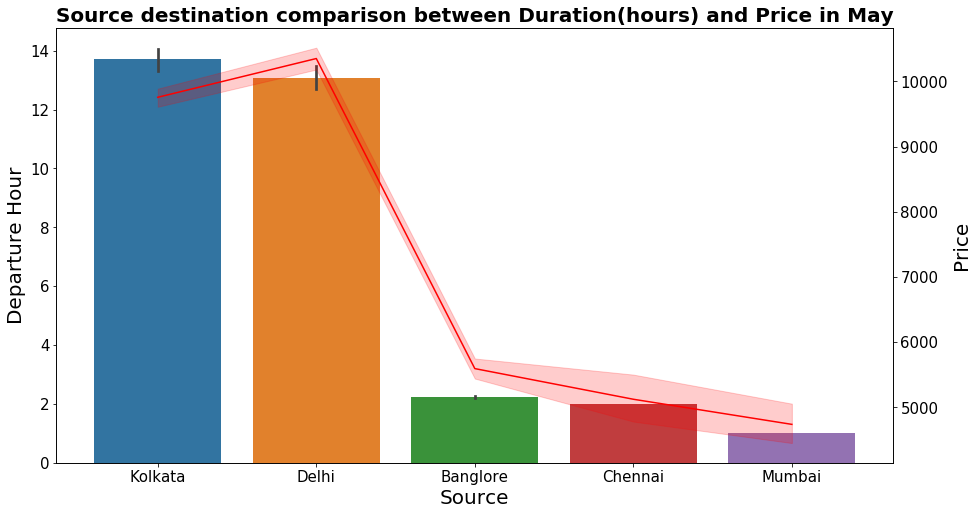

In [73]:
plt.figure(figsize=(15,8))
ax = sns.barplot(may_airlines['Source'] , may_airlines['Duration_Hour'])
plt.title("Source destination comparison between Duration(hours) and Price in May", fontweight= 'bold', size = 20)
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.xlabel('Source',size = 20 )
plt.ylabel('Departure Hour', size = 20)

ax2 = ax.twinx()
sns.lineplot(may_airlines['Source'] , may_airlines['Price'], color = 'red')
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.xlabel('Source',size = 20 )
plt.ylabel('Price', size = 20)

## Observation:

As a result, flights taken in the afternoon between 12 PM and 2 PM cost more than flights in the evening. From Delhi and Kolkata, most people favoured midday travel.

C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Price')

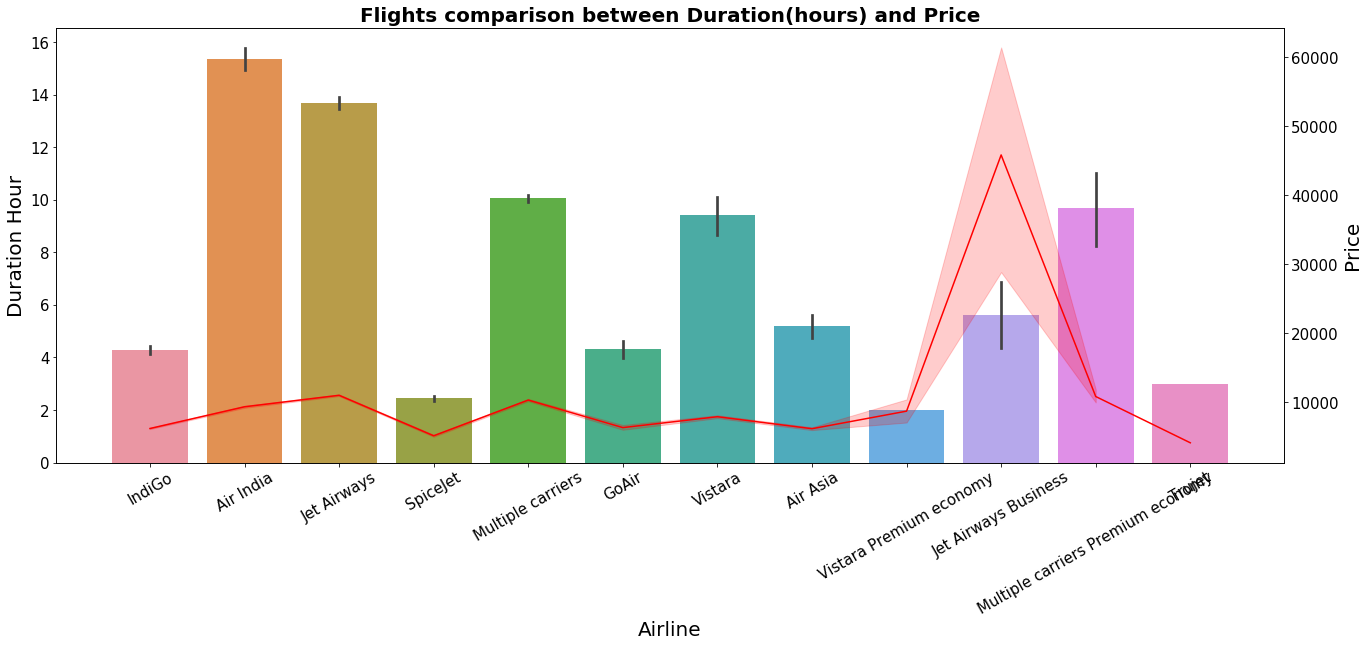

In [74]:
#duration vs price of planes
plt.figure(figsize=(22,8))
ax = sns.barplot(final_df['Airline'] , final_df['Duration_Hour'])
plt.title("Flights comparison between Duration(hours) and Price", fontweight= 'bold', size = 20)
plt.yticks(size= 15)
plt.xticks(size= 15, rotation = 30)
plt.xlabel('Airline',size = 20 )
plt.ylabel('Duration Hour', size = 20)

ax2 = ax.twinx()
sns.lineplot(final_df['Airline'] , final_df['Price'], color = 'red')
plt.yticks(size= 15)
plt.xticks(size= 15, rotation = 30)
plt.ylabel('Price', size = 20)

## Observation:
The price range fluctuates depending on the number of flight hours, but based on our observations, Jet Airways' costs abruptly increased.

In [75]:
jab = final_df[final_df['Airline']=='Jet Airways Business']
jab

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Hour
657,Jet Airways Business,Banglore,New Delhi,5h,1.0,No info,52229.0,1,3,2019,10,45,5,45,5
2924,Jet Airways Business,Banglore,New Delhi,5h 40m,1.0,Business class,79512.0,1,3,2019,11,25,5,45,5
5372,Jet Airways Business,Banglore,New Delhi,6h 40m,1.0,Business class,62427.0,1,3,2019,12,25,5,45,6
7351,Jet Airways Business,Delhi,Cochin,8h 20m,2.0,No info,46490.0,3,3,2019,4,25,20,5,8
9715,Jet Airways Business,Delhi,Cochin,8h 20m,2.0,No info,52285.0,6,3,2019,4,25,20,5,8
10364,Jet Airways Business,Banglore,New Delhi,4h 40m,1.0,Business class,57209.0,1,3,2019,14,25,9,45,4
1802,Jet Airways Business,Banglore,New Delhi,7h 30m,1.0,Business class,8372.0,1,3,2019,13,15,5,45,7
1819,Jet Airways Business,Banglore,New Delhi,2h 40m,0.0,No info,8372.0,3,3,2019,22,35,19,55,2


C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

Text(0, 0.5, 'Duration Hour')

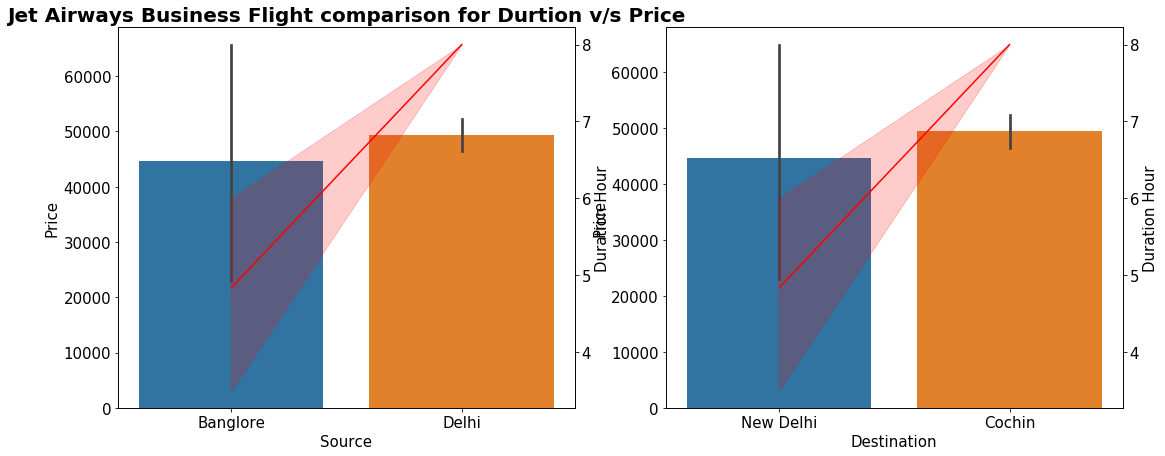

In [76]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)


ax = sns.barplot(jab['Source'],jab['Price'])
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.xlabel('Source',size = 15 )
plt.ylabel('Price', size = 15)

ax2 = ax.twinx()
sns.lineplot(jab['Source'], jab['Duration_Hour'], color = 'red')
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.xlabel('Source',size = 15 )
plt.ylabel('Duration Hour', size = 15)

plt.title("Jet Airways Business Flight comparison for Durtion v/s Price", fontweight= 'bold', size = 20, loc = 'center')

plt.subplot(1,2,2)
ax = sns.barplot(jab['Destination'],jab['Price'])
plt.yticks(size= 15)
plt.xticks(size= 15)
plt.xlabel('Destination',size = 15 )
plt.ylabel('Price', size = 15)

ax2 = ax.twinx()
sns.lineplot(jab['Destination'], jab['Duration_Hour'], color = 'red')
plt.yticks(size= 15)
plt.xticks(size= 15)
#plt.xlabel('Source',size = 20 )
plt.ylabel('Duration Hour', size = 15)

## Observations:
Two stops are made on route from Delhi to Cochin.
The journey from Bangalore to Delhi on March 1st, however, was significantly less expensive than other flights on the same day.

C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Shriya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Total Stops')

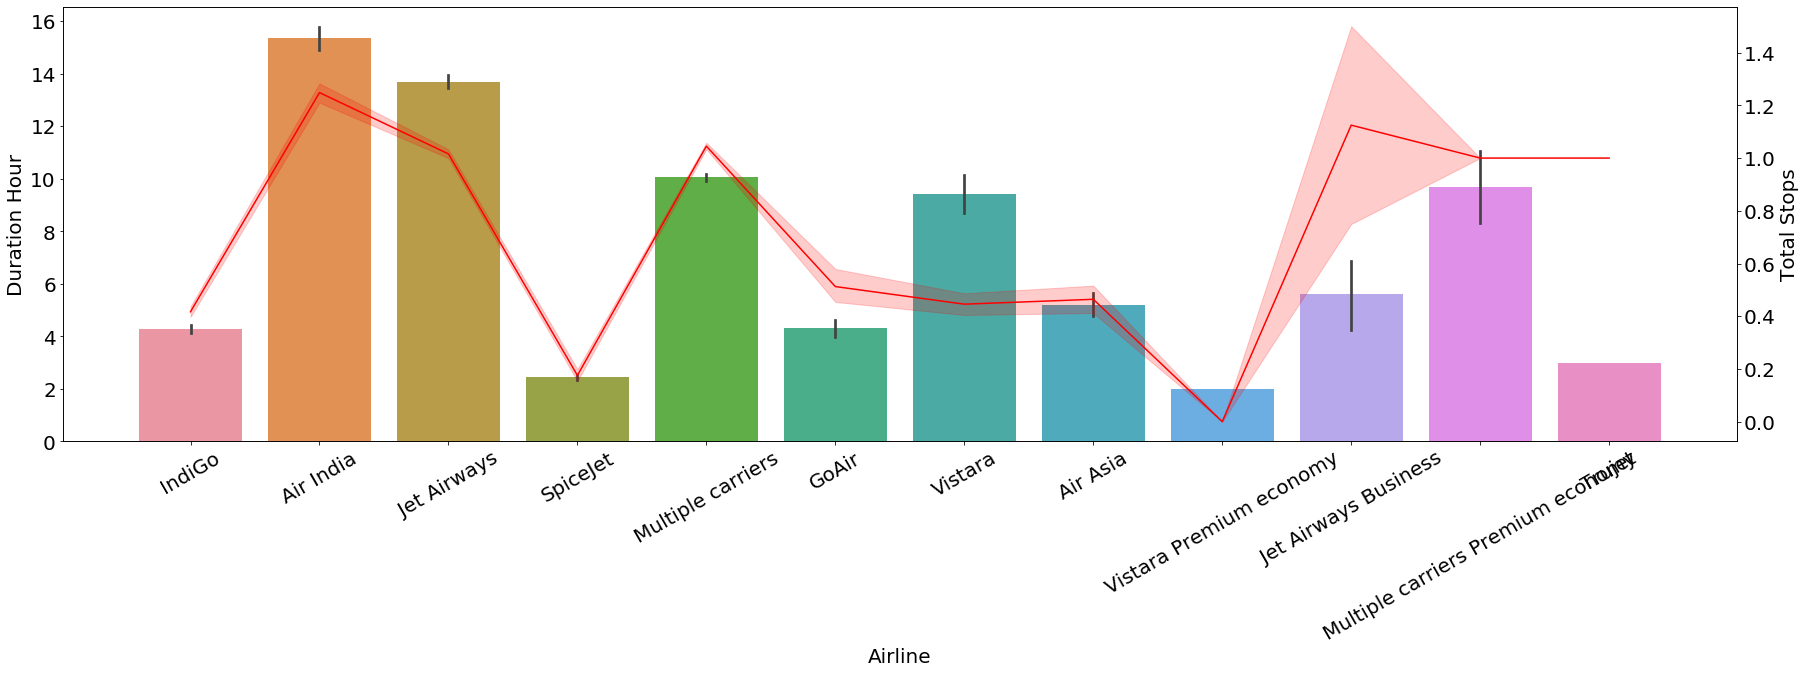

In [77]:
plt.figure(figsize=(30,8))
ax = sns.barplot(final_df['Airline'] , final_df['Duration_Hour'])
plt.xticks(rotation = 30 , fontsize=20)
plt.yticks(fontsize=17)
plt.yticks(size= 20)
plt.xticks(size= 20)
plt.xlabel('Airline',size = 20 )
plt.ylabel('Duration Hour', size = 20)


ax2 = ax.twinx()
sns.lineplot(final_df['Airline'] , final_df['Total_Stops'], color = 'red')
plt.yticks(size= 20)
plt.xticks(size= 15)
#plt.xlabel('Airlines',size = 15 )
plt.ylabel('Total Stops', size = 20)

## Observations:


## Observations:
Two stops are made on route from Delhi to Cochin. The journey from Bangalore to Delhi on March 1st, however, was significantly less expensive than other flights on the same day.

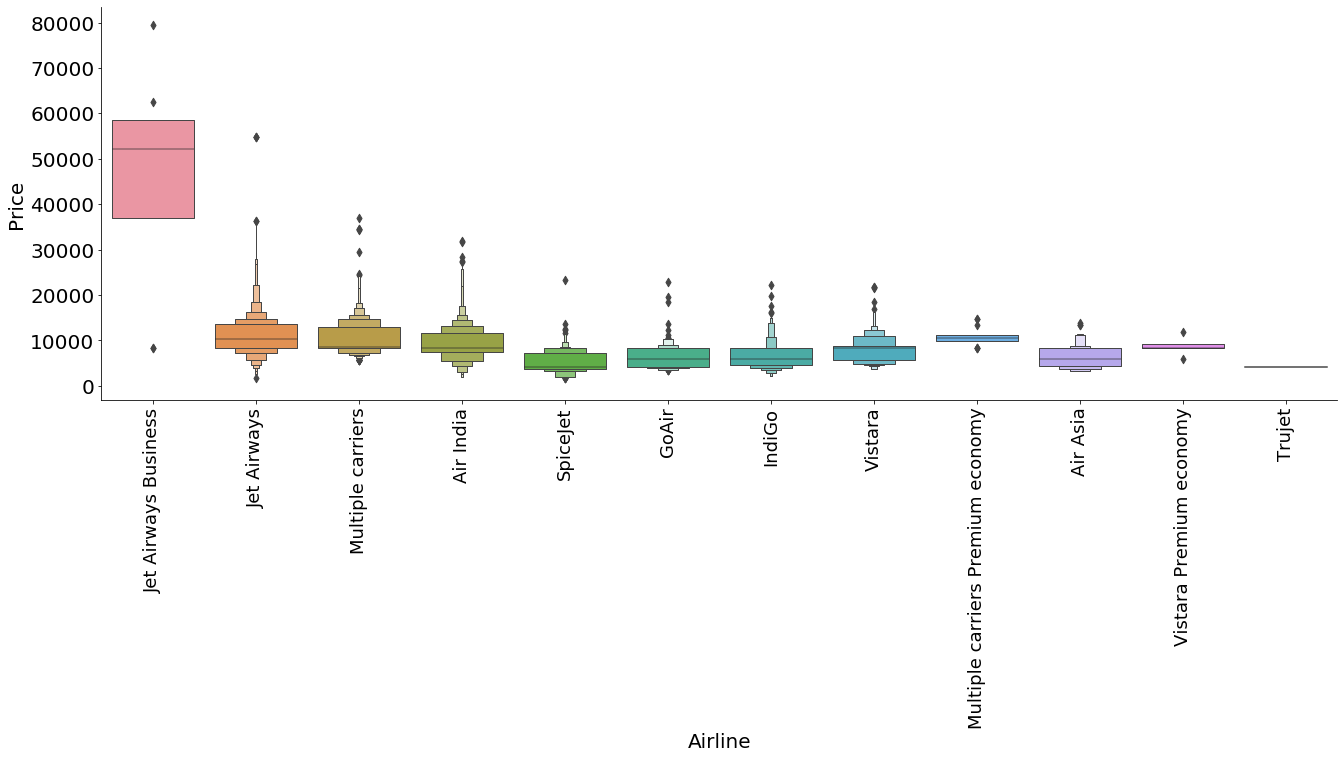

In [78]:
#Airplane vs Price :
sns.catplot(y = "Price", x = "Airline", data = final_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.xticks(rotation = 90 , fontsize=18)
plt.yticks(size=20)
plt.xlabel('Airline',size = 20 )
plt.ylabel('Price', size = 20)
plt.show()

## Observations:

Only a few of the tickets have prices around $55,000, with the average flight costing between 8000 and 30,000.
There are only a few flights on Jet Airways Business that cost more than 80,000.


In [79]:
Airlines = final_df["Airline"]
Airlines = pd.get_dummies(final_df['Airline'], drop_first=True)
Airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [80]:
Sources = final_df[["Source"]]
Sources = pd.get_dummies(final_df['Source'],drop_first=True)
Sources.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [81]:
Destinations = final_df["Destination"]

Destinations = pd.get_dummies(Destinations, drop_first = True)

Destinations.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [82]:
#dropping additional info :
final_df.drop(["Additional_Info"], axis = 1, inplace = True)

In [83]:
final_df

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2.0,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,13302.0,1,3,2019,21,35,16,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1.0,8372.0,6,6,2019,20,25,20,30,23
2667,IndiGo,Kolkata,Banglore,2h 35m,0.0,8372.0,27,3,2019,16,55,14,20,2
2668,Jet Airways,Delhi,Cochin,6h 35m,1.0,8372.0,6,3,2019,4,25,21,50,6
2669,Air India,Delhi,Cochin,15h 15m,1.0,8372.0,6,3,2019,19,15,4,0,15


In [84]:
final_df['Total_Stops'].value_counts()

1.0    7056
0.0    4340
2.0    1896
3.0      56
4.0       2
Name: Total_Stops, dtype: int64

In [85]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Airline        13350 non-null  object 
 1   Source         13350 non-null  object 
 2   Destination    13350 non-null  object 
 3   Duration       13350 non-null  object 
 4   Total_Stops    13350 non-null  float64
 5   Price          13350 non-null  float64
 6   Date           13350 non-null  int32  
 7   Month          13350 non-null  int32  
 8   Year           13350 non-null  int32  
 9   Arrival_hour   13350 non-null  int32  
 10  Arrival_min    13350 non-null  int32  
 11  Dep_hour       13350 non-null  int32  
 12  Dep_min        13350 non-null  int32  
 13  Duration_Hour  13350 non-null  int32  
dtypes: float64(2), int32(8), object(4)
memory usage: 1.4+ MB


In [86]:
final_df['Total_Stops'].unique()

array([0., 2., 1., 3., 4.])

In [87]:
final_df['Total_Stops'] = final_df['Total_Stops'].astype(int)

In [88]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Hour
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302.0,1,3,2019,21,35,16,50,4


In [89]:
#Concatenate dataframe --> train_data + Airline + Source + Destination
final_df=pd.concat([final_df,Airlines , Sources, Destinations],axis=1)


In [90]:
# we have drop the varibles
final_df.drop(["Airline","Source","Destination"],axis=1,inplace=True)
final_df.head()

,Duration,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,2h 50m,0,3897.0,24,3,2019,1,10,22,20,...,0,0,0,0,0,0,0,0,0,1
1,7h 25m,2,7662.0,1,5,2019,13,15,5,50,...,0,0,0,1,0,0,0,0,0,0
2,19h,2,13882.0,9,6,2019,4,25,9,25,...,0,0,1,0,0,1,0,0,0,0
3,5h 25m,1,6218.0,12,5,2019,23,30,18,5,...,0,0,0,1,0,0,0,0,0,0
4,4h 45m,1,13302.0,1,3,2019,21,35,16,50,...,0,0,0,0,0,0,0,0,0,1


In [91]:
final_df.drop(['Duration'] , axis = 1, inplace = True)
final_df.head(2)

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897.0,24,3,2019,1,10,22,20,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662.0,1,5,2019,13,15,5,50,7,...,0,0,0,1,0,0,0,0,0,0


In [92]:
final_df.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_Hour', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [93]:
X= final_df[['Total_Stops', 'Date', 'Month', 'Year', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_Hour', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi']]
X.head()

,Total_Stops,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Hour,Air India,...,Kolkata,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi
0,0,24,3,2019,1,10,22,20,2,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,13,15,5,50,7,1,...,1,0,0,0,0,0,0,1,0,0
2,2,9,6,2019,4,25,9,25,19,0,...,0,0,0,1,1,0,0,0,0,0
3,1,12,5,2019,23,30,18,5,5,0,...,1,0,0,0,0,0,0,1,0,0
4,1,1,3,2019,21,35,16,50,4,0,...,0,0,0,0,0,0,0,0,0,1


In [94]:
y=final_df['Price']

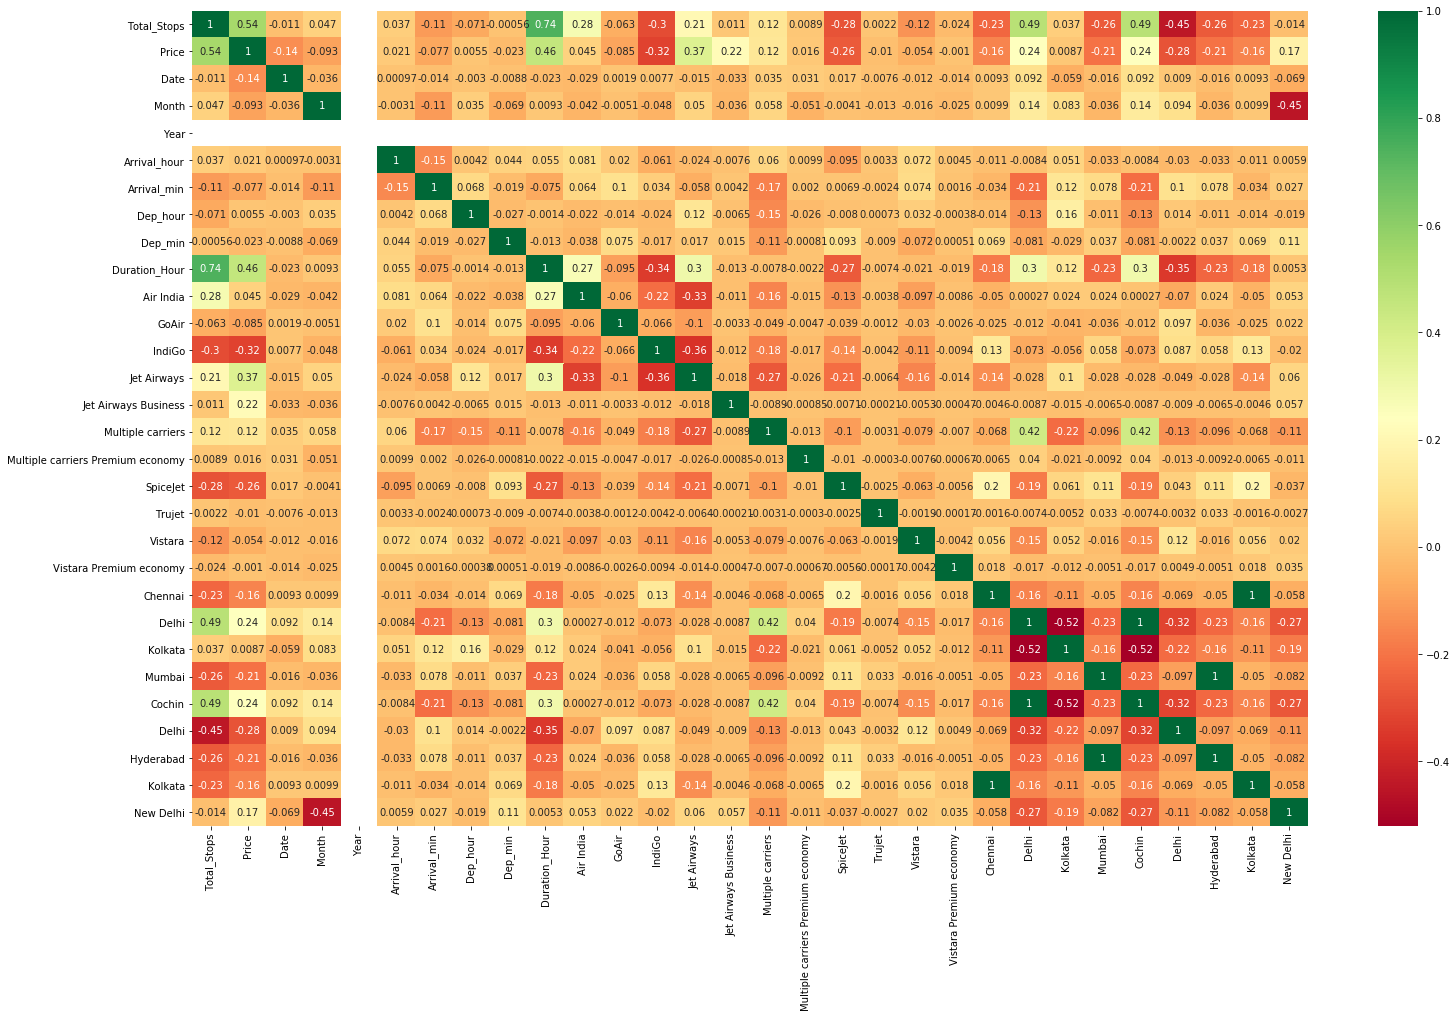

In [95]:
# Heatmap
plt.figure(figsize=(25,15))
sns.heatmap(final_df.corr(),annot = True, cmap = "RdYlGn")

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [97]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [98]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
models.head(10)

100%|██████████| 38/38 [02:20<00:00,  3.70s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.63,0.63,2577.33,2.74
HistGradientBoostingRegressor,0.63,0.63,2592.60,3.27
LGBMRegressor,0.63,0.63,2593.23,0.96
RandomForestRegressor,0.60,0.60,2682.54,5.25
XGBRegressor,0.59,0.60,2700.48,2.63
BaggingRegressor,0.57,0.58,2775.31,0.60
KNeighborsRegressor,0.57,0.57,2793.46,3.11
ExtraTreesRegressor,0.52,0.52,2946.14,4.50
LinearRegression,0.51,0.52,2953.59,0.67


In [99]:
# Feature scaling using Gradient Boosting regressor 
from sklearn.ensemble import GradientBoostingRegressor
selection = GradientBoostingRegressor()
selection.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

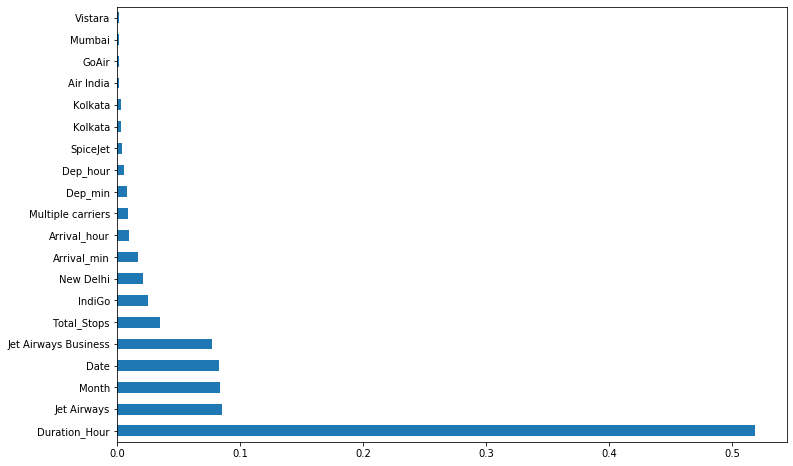

In [100]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [101]:
selection.score(x_train , y_train)

0.6318325079379942

In [102]:
selection.score(x_test , y_test)

0.6558756175098555

In [103]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

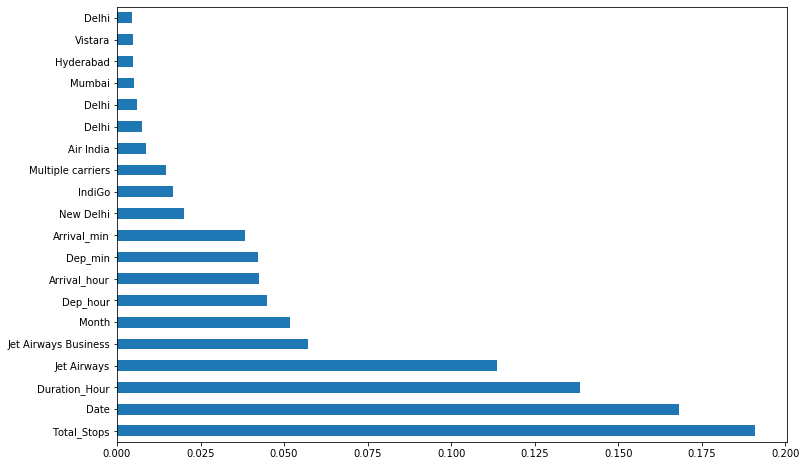

In [104]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [105]:
selection.score(x_train , y_train)

0.9249971592180763

In [106]:
selection.score(x_test , y_test)

0.9296756666554123

In [107]:
data = final_df.drop(["Price"], axis=1)

In [108]:
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = test_df.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = test_df.select_dtypes(include=['int64', 'float','int32'])
train_categorical_data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)
train_categorical_data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [111]:
#Concatenating both Categorical Data and Numerical Data

X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y = final_df['Price']
test_set = pd.concat([test_categorical_data, test_numerical_data], axis=1)
X.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,New Delhi,Total_Stops,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Hour
0,0,0,1,0,0,0,0,0,0,0,...,1,0,24,3,2019,1,10,22,20,2
1,1,0,0,0,0,0,0,0,0,0,...,0,2,1,5,2019,13,15,5,50,7
2,0,0,0,1,0,0,0,0,0,0,...,0,2,9,6,2019,4,25,9,25,19
3,0,0,1,0,0,0,0,0,0,0,...,0,1,12,5,2019,23,30,18,5,5
4,0,0,1,0,0,0,0,0,0,0,...,1,1,1,3,2019,21,35,16,50,4


In [112]:
y.head()

0    3897.00
1    7662.00
2   13882.00
3    6218.00
4   13302.00
Name: Price, dtype: float64

# Conclusion:
The length of the flight closely relates to the cost. Maximum flights were taken in the 5th and 6th month . Most people booked their flights on Jet Airways in May, and very few people travelled on GoAir. The departure hour is generally between 11 AM and 2 PM, while the arrival hour is generally between 12 AM and 2 PM from the source destination.

The price range fluctuates depending on the number of flight hours, but based on our observations, Jet Airways' costs abruptly increased. Only a few of the tickets have prices around $55,000, with the average flight costing between 8000 and 30,000. There are only a few flights on Jet Airways Business that cost more than 80,000.

ExtraTreesRegressor produced the best score of accuracy of 0.92.
Predicted Prices are:
0    3897.00
1    7662.00
2   13882.00
3    6218.00
4   13302.00